Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 114MB/s]


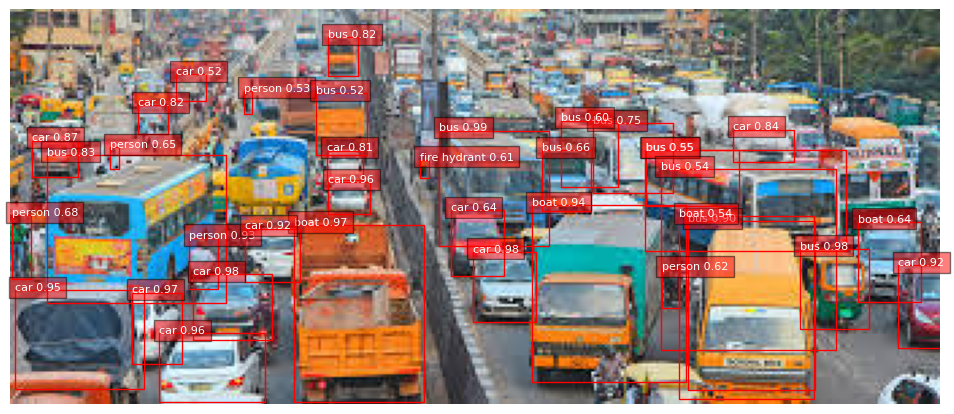

In [7]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import torchvision.transforms as transforms

input_image_path = "/content/BUS2.jpg"
input_image = Image.open(input_image_path)

max_image_dimension = 1000

if input_image.size[0] > max_image_dimension or input_image.size[1] > max_image_dimension:
    input_image.thumbnail((max_image_dimension, max_image_dimension))

image_transform = transforms.Compose([transforms.ToTensor()])

input_image_tensor = image_transform(input_image).unsqueeze(dim=0)

model = fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1)
model.eval()

with torch.no_grad():
    predictions = model(input_image_tensor)

COCO_LABELS = [
    '', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
    'teddy bear', 'hair drier', 'toothbrush'
]

image_np = input_image_tensor.squeeze().detach().cpu().numpy()
image_np = image_np.transpose(1, 2, 0)

if image_np.shape[0] > max_image_dimension or image_np.shape[1] > max_image_dimension:
    image_pil_resized = Image.fromarray((image_np * 255).astype('uint8'))
    image_pil_resized.thumbnail((max_image_dimension, max_image_dimension))
    image_np = np.array(image_pil_resized) / 255.0

fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image_np)

for box, label, score in zip(predictions[0]['boxes'].detach().cpu().numpy(),
                             predictions[0]['labels'].detach().cpu().numpy(),
                             predictions[0]['scores'].detach().cpu().numpy()):
    if score > 0.5:
        x1, y1, x2, y2 = box
        label_name = COCO_LABELS[label]
        ax.add_patch(patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none'))
        plt.text(x1, y1, f'{label_name} {score:.2f}', color='white', fontsize=8,
                 bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')
output_image_path = "/content/BUS2.jpg"
plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()
